# Pandas Manipulating Data
---

go to resources - [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html) and [Real Python](https://realpython.com/pandas-dataframe/#accessing-and-modifying-data)

## Import pandas 

and set the sample data directory and filename

In [13]:
import pandas as pd

In [14]:
# check the directory to see if the file is there
!ls '../datafiles/'

data.csv                  iris.jsonl                iris.yml
data.txt                  iris.m                    iris_quotes.csv
iris-quotes.csv           iris.py                   people_100.csv
iris.csv                  iris.sql                  people_100_no_headers.csv
iris.json                 iris.xml                  timetable.tsv


In [15]:
datadir = '../datafiles/'
people_filename = datadir + 'people_100.csv'
timetable_filename = datadir + 'timetable.tsv'

### timetable data

this is real anolymised data is a tab seperated format `df = pd.read_csv(file, sep="\t")` because it is real it has missing data and some data is that is in different formats

In [17]:
df = pd.read_csv(timetable_filename, sep='\t')
df.head(3)

,Department,Scheduled?,Name on sys,Name,Size,Module ID,Module,Duration,Named Availability,Number of Weeks,Staff (delimited),Name of Type,Location Suitabilities,Locations,Student Sets,Teaching week pattern
0,Mayo Campus,t,NURS06061 (General) and NURS06057 (Psych) Pra...,NURS06061 (General) and NURS06057 (Psych) Pra...,40,NURS06061 (General) and NURS06057 (Psych),NURS06061 (General) and NURS06057 (Psych) Inte...,4,MY_Week24 N2bii,1,"MacLeod, Julia",P,MY_SR_Any-Flat,NaN,NaN,0000000000000000000000010000000000000000000000...
1,Mayo Campus,t,NURS06060 Recovery Orientated care in mental h...,NURS06060 Recovery Orientated care in mental h...,18,NURS06060,NURS06060 Recovery Orientated care in mental h...,3,MY_a sem1,12,"Edmunds, Colin",OL,NaN,NaN,MY_SP_DIGI 1,0000111111111111000000000000000000000000000000...
2,Mayo Campus,t,ENVI07011-Nursing Learning to Learn-Nursing S...,ENVI07011-Nursing Learning to Learn-Nursing G,32,ENVI07011,ENVI07011 LEARNING AND INNOVATION SKILLS (Nurs...,2,MY__N_2 abc,7,"Carr, Isaac",OL,MY_SR_AnyAll+art,NaN,NURS_GA_SGENC_H080100 A/NURS_GA_SGENC_H080100 ...,0000000000000000000011111110000000000000000000...


### Selecting particular rows '[indexing](https://pandas.pydata.org/docs/user_guide/indexing.html#different-choices-for-indexing)'
`df.iloc[]`(returns the indexed position) and `df.loc[]`(returns the position)

In [20]:
#df.iloc[40:50]  # show rows 40 to 49
#df.loc[[44,46]]  # show the value at row 44, column 46
df.loc[[44,46], ['Staff (delimited)']]  # show the values at rows 44 and 46, column 'Staff (delimited)'

,Staff (delimited)
44,"Carr, Connor/Marshall, Vanessa"
46,"Allan, Steven"


#### more complicated examples

find all rows which have multiple staff

In [22]:
#df[df['Staff (delimited)'].str.contains('/')] #cannot return as there is empty cell in the column
cleandf = df.fillna(value=' ')
cleandf[cleandf['Staff (delimited)'].str.contains('/')] #can return as there is no empty cell in the column

,Department,Scheduled?,Name on sys,Name,Size,Module ID,Module,Duration,Named Availability,Number of Weeks,Staff (delimited),Name of Type,Location Suitabilities,Locations,Student Sets,Teaching week pattern
9,Mayo Campus,t,NURS06061 Practice Placement MAPA P/02,NURS06061 Biology in Mental Illness 1 MAPA,0,NURS06061 (General) and NURS06057 (Psych),NURS06061 Biology in Mental Illness 1,4,MY_Week04 N1aiii,1,"Burgess, Isaac/Wilkins, Wendy/Baker, Kevin/Har...",P,MYCV2_Skills_Nur,,NURS_GA_SPSYC_H080100 A/NURS_GA_SPSYC_H080100 B,0001000000000000000000000000000000000000000000...
42,Mayo Campus,t,MGMT07044 Personal and professional developmen...,MGMT07044 Personal and professional developmen...,30,MGMT07044,MGMT07044 Personal and professional developmen...,2,MY__N_1c special week,1,"Carr, Connor/Marshall, Vanessa",OL,MY_SR_Nur_Bio,,NURS_GA_SPSYC_H080200 A,0000000000100000000000000000000000000000000000...
44,Mayo Campus,t,MGMT07044 Personal and professional developmen...,MGMT07044 Personal and professional developmen...,30,MGMT07044,MGMT07044 Personal and professional developmen...,3,MY__N_1d,3,"Carr, Connor/Marshall, Vanessa",OL,MY_SR_Nur_Bio,,NURS_GA_SPSYC_H080200 A,0000000000011100000000000000000000000000000000...
52,Mayo Campus,t,NURS08047 Employment Law/Psychiatric Nursing P...,NURS08047 Employment Law/Management Report P,10,NURS08047,NURS08047 Employment Law/Management Report,4,MY_Week28 N2di,1,"Harris, Lily/Wilkins, Wendy/Baker, Kevin/Marsh...",P,MYCV2_Skills_Nur,MYC2_NLab-P102-Taffe/MYC2_NLab-Y011-N/Gale,NURS_GA_SPSYC_H080100 A/NURS_GA_SPSYC_H080100 B,0000000000000000000000000001000000000000000000...
54,Mayo Campus,t,NURS08047 Employment Law/Psychiatric Nursing P...,NURS08047 Employment Law/Management Report P,10,NURS08047,NURS08047 Employment Law/Management Report,4,MY_Week23 N2bi,1,"Harris, Lily/Wilkins, Wendy/Baker, Kevin/Marsh...",P,MYCV2_Skills_Nur,MYC2_NLab-P102-Taffe/MYC2_NLab-Y011-N/Gale,NURS_GA_SPSYC_H080100 A/NURS_GA_SPSYC_H080100 B,0000000000000000000000100000000000000000000000...
77,Mayo Campus,t,NURS06061 Practice Placement MH1/L/03,NURS06061 Biology in Mental Illness 1,0,NURS06061 (General) and NURS06057 (Psych),NURS06061 Biology in Mental Illness 1,4,MY_Week04 N1aiii,1,"MacLeod, Julia/Newman, Andrew",OL,MYCV2_SR_Nur+skills,,NURS_GA_SGENC_H080100 F,0001000000000000000000000000000000000000000000...
78,Mayo Campus,t,NURS06020 LAW AND ETHICS FOR PSYCHIATRIC NURSI...,NURS06020 LAW AND ETHICS FOR PSYCHIATRIC NURSI...,10,NURS06020,NURS06020 LAW AND ETHICS FOR PSYCHIATRIC NURSI...,4,MY__N postgrad S2 W2 site,1,"Jackson, Max/Clarkson, Peter",L,MYCV2_SR_AnyAll,MYC2_SR-P009-McManus,MY_SP_LM,0000000000000000000000001000000000000000000000...
80,Mayo Campus,t,NURS06020 LAW AND ETHICS FOR PSYCHIATRIC NURSI...,NURS06020 LAW AND ETHICS FOR PSYCHIATRIC NURSI...,10,NURS06020,NURS06020 LAW AND ETHICS FOR PSYCHIATRIC NURSI...,4,MY__N postgrad S2 W4 site,1,"Jackson, Max/Clarkson, Peter",L,MYCV2_SR_AnyAll,MYC2_SR-P009-McManus,MY_SP_LM,0000000000000000000000000000000010000000000000...
81,Mayo Campus,t,MGMT07037 (General) and NURS06057 (Psych) Inte...,MGMT07037 (General) and NURS06057 (Psych) Inte...,10,MGMT07037,MGMT07037 (General) and NURS06057 (Psych) Inte...,4,MY__N postgrad S2 W2 site,1,"Nolan, Stewart/Rutherford, Alexander",L,MYCV2_SR_AnyAll,MYC2_SR-P009-McManus,MY_SP_LM,0000000000000000000000001000000000000000000000...
82,Mayo Campus,t,MGMT07037 (General) and NURS06057 (Psych) Inte...,MGMT07037 (General) and NURS06057 (Psych) Inte...,10,MGMT07037,MGMT07037 (General) and NURS06057 (Psych) Inte...,4,MY__N postgrad S2 W3 site,1,"Nolan, Stewart/Rutherford, Alexander",L,MYCV2_SR_AnyAll,MYC2_SR-P009-McManus,MY_SP_LM,0000000000000000000000000001000000000000000000...


### drop the specific dolumns

`df.drop()` use `inplace = True` param to override the dataframe or create a new alias 

In [ ]:
# drop rows 1 and 3 and update the dataframe
# df.drop([1,3], inplace=True)  

# or create a new dataframe
# df = df.drop([1,3])


### Make a new column

anything numpy can do, Pandas also can do as well, series eg multiply two columns

In [23]:
df['total_hours'] = df['Duration'] * df['Number of Weeks']
df.head(3)

,Department,Scheduled?,Name on sys,Name,Size,Module ID,Module,Duration,Named Availability,Number of Weeks,Staff (delimited),Name of Type,Location Suitabilities,Locations,Student Sets,Teaching week pattern,total_hours
0,Mayo Campus,t,NURS06061 (General) and NURS06057 (Psych) Pra...,NURS06061 (General) and NURS06057 (Psych) Pra...,40,NURS06061 (General) and NURS06057 (Psych),NURS06061 (General) and NURS06057 (Psych) Inte...,4,MY_Week24 N2bii,1,"MacLeod, Julia",P,MY_SR_Any-Flat,NaN,NaN,0000000000000000000000010000000000000000000000...,4
1,Mayo Campus,t,NURS06060 Recovery Orientated care in mental h...,NURS06060 Recovery Orientated care in mental h...,18,NURS06060,NURS06060 Recovery Orientated care in mental h...,3,MY_a sem1,12,"Edmunds, Colin",OL,NaN,NaN,MY_SP_DIGI 1,0000111111111111000000000000000000000000000000...,36
2,Mayo Campus,t,ENVI07011-Nursing Learning to Learn-Nursing S...,ENVI07011-Nursing Learning to Learn-Nursing G,32,ENVI07011,ENVI07011 LEARNING AND INNOVATION SKILLS (Nurs...,2,MY__N_2 abc,7,"Carr, Isaac",OL,MY_SR_AnyAll+art,NaN,NURS_GA_SGENC_H080100 A/NURS_GA_SGENC_H080100 ...,0000000000000000000011111110000000000000000000...,14


###

### removing value in the columns


In [ ]:
people_df = pd.read_csv(people_filename)
people_df.head(3)

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,88F7B33d2bcf9f5,Shelby,Terrell,Male,elijah57@example.net,001-084-906-7849x73518,1945-10-26,Games developer
1,2,f90cD3E76f1A9b9,Phillip,Summers,Female,bethany14@example.com,214.112.6044x4913,1910-03-24,Phytotherapist
2,3,DbeAb8CcdfeFC2c,Kristine,Travis,Male,bthompson@example.com,277.609.7938,1992-07-02,Homeopath


In [42]:
# getting email domains
people_df['email_domain'] = people_df['Email'].str.split('@').str[1]
people_df['email_domain'] = people_df['email_domain'].astype("string")
people_df.head(3)

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title,email_domain
0,1,88F7B33d2bcf9f5,Shelby,Terrell,Male,elijah57@example.net,001-084-906-7849x73518,1945-10-26,Games developer,example.net
1,2,f90cD3E76f1A9b9,Phillip,Summers,Female,bethany14@example.com,214.112.6044x4913,1910-03-24,Phytotherapist,example.com
2,3,DbeAb8CcdfeFC2c,Kristine,Travis,Male,bthompson@example.com,277.609.7938,1992-07-02,Homeopath,example.com


In [43]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          100 non-null    int64 
 1   User Id        100 non-null    object
 2   First Name     100 non-null    object
 3   Last Name      100 non-null    object
 4   Sex            100 non-null    object
 5   Email          100 non-null    object
 6   Phone          100 non-null    object
 7   Date of birth  100 non-null    object
 8   Job Title      100 non-null    object
 9   email_domain   100 non-null    string
dtypes: int64(1), object(8), string(1)
memory usage: 7.9+ KB


array([<Axes: >], dtype=object)

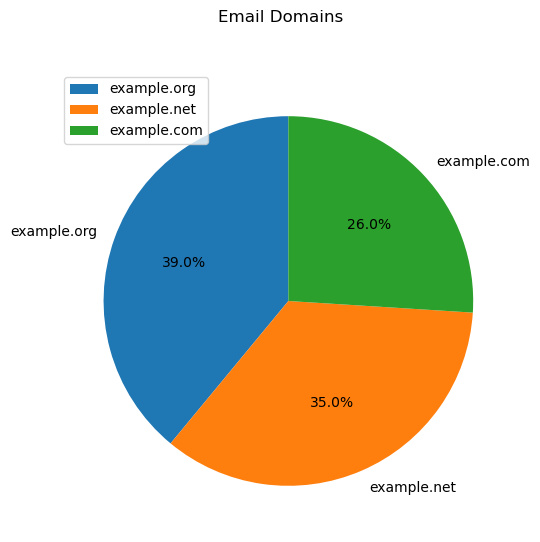

In [49]:
# email_domain in a pie chart
people_df['email_domain'].value_counts().plot.pie(subplots=True, figsize=(6, 6), 
                                                  autopct='%1.1f%%', 
                                                  startangle=90, 
                                                  legend=True, 
                                                  title='Email Domains', 
                                                  fontsize=10, label='')